In [2]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("../data/one_train_denoised.csv",sep=',')
df['timestamp'] = pd.to_datetime(df.timestamp)

In [4]:
df['weekday'] = df.timestamp.apply(lambda x: x.isoweekday())
df['time'] = df.timestamp.apply(lambda x: x.timetuple())
df['timestamp_int'] = df.time.apply(lambda x: int(time.mktime(x)))
df['day'] = df.time.apply(lambda x: x.tm_mday)
df['hour'] = df.time.apply(lambda x: x.tm_hour)
df['minute'] = df.time.apply(lambda x: x.tm_min)
df['pre_1minute'] = df.value.shift(1)
df['pre_2minute'] = df.value.shift(2)
df['pre_3minute'] = df.value.shift(3)
df['pre_4minute'] = df.value.shift(4)
df['pre_5minute'] = df.value.shift(5)
df['pre_1day'] = df.value.shift(60*24)
df['pre_1week'] = df.value.shift(7*60*24)

In [5]:
mean_df = df[['value','hour','minute']]
std_df = mean_df.groupby(['hour','minute'])['value'].agg({'mean':np.median, '3std':lambda x:3*np.std(x)}).reset_index()

std_df['mean_low'] = std_df['mean']-std_df['3std']
std_df['mean_high'] = std_df['mean']+std_df['3std']
std_df.head()

,hour,minute,mean,3std,mean_low,mean_high
0,0,0,2.078125,0.725054,1.353071,2.803179
1,0,1,2.078125,0.757506,1.320619,2.835631
2,0,2,2.064516,0.845023,1.219493,2.909539
3,0,3,2.095238,0.760809,1.334430,2.856047
4,0,4,2.109375,0.760964,1.348411,2.870339


In [74]:
std_df[['hour','minute','3std']].to_csv("../data/hour_minute_3std.csv",index=False)

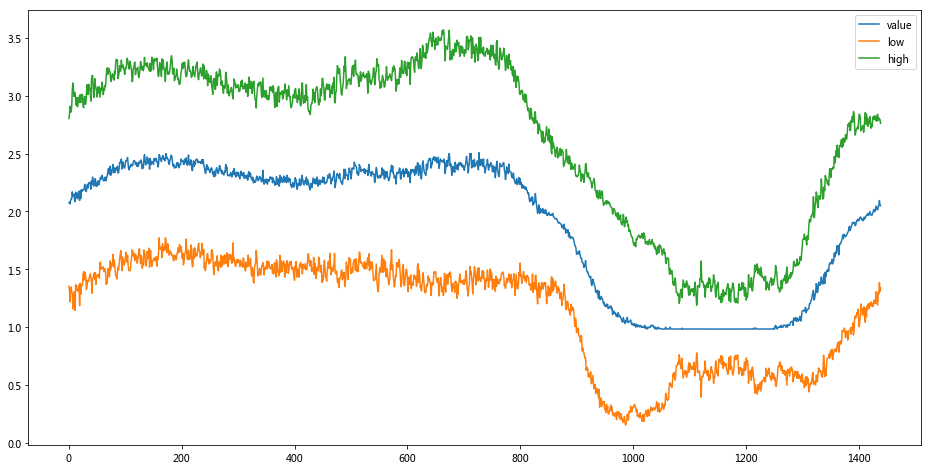

In [7]:
plt.figure(figsize=(16,8))
std_df['mean'].plot( label = 'value')
std_df['mean_low'].plot(label='low')
std_df['mean_high'].plot(label = 'high')
plt.legend(loc='best')
plt.show()

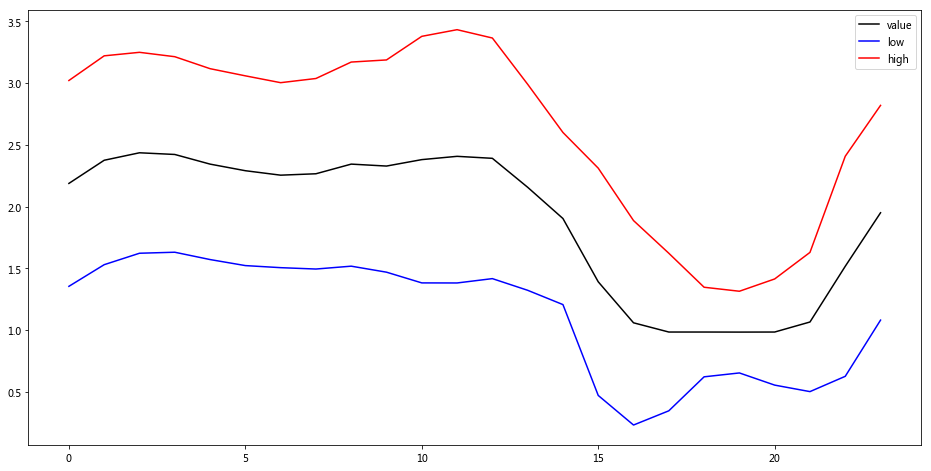

In [73]:
std_hour_df = df[['value','hour']].groupby(['hour'])['value'].agg({'mean':np.median, '3std':lambda x:3*np.std(x)}).reset_index()
std_hour_df['mean_low'] = std_hour_df['mean']-std_hour_df['3std']
std_hour_df['mean_high'] = std_hour_df['mean']+std_hour_df['3std']
# std_hour_df.head()
plt.figure(figsize=(16,8))
std_hour_df['mean'].plot(color='black', label = 'value')
std_hour_df['mean_low'].plot(color='blue',label='low')
std_hour_df['mean_high'].plot(color='red',label = 'high')
plt.legend(loc='best')
plt.show()

In [33]:
feature_df = df[7*60*24:]
feature_df.drop(['time','pre_1week'],axis=1,inplace=True)
feature_df.set_index('timestamp',inplace=True,drop=True)

In [43]:
feature_df.head()

,value,label,weekday,day,hour,minute,timestamp_int,pre_1minute,pre_2minute,pre_3minute,pre_4minute,pre_5minute,pre_1day
timestamp,,,,,,,,,,,,,
2017-05-08 04:06:00,2.508197,0,1,8,4,6,1494187560,2.737705,2.918033,3.032787,2.786885,2.918033,2.344262
2017-05-08 04:07:00,2.885246,0,1,8,4,7,1494187620,2.508197,2.737705,2.918033,3.032787,2.786885,2.344262
2017-05-08 04:08:00,2.803279,0,1,8,4,8,1494187680,2.885246,2.508197,2.737705,2.918033,3.032787,2.524590
2017-05-08 04:09:00,2.868852,0,1,8,4,9,1494187740,2.803279,2.885246,2.508197,2.737705,2.918033,2.409836
2017-05-08 04:10:00,2.770492,0,1,8,4,10,1494187800,2.868852,2.803279,2.885246,2.508197,2.737705,2.606557


In [35]:
feature_df.to_csv("../data/feature_1.csv")